# Analysis notebook: `SU2020b_CRY_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_onspill-LH_aw

analysis.csv  events.parquet  info.txt	   SU2020b_CRY_onspill-LH_aw.log
cut_flow.csv  hists.h5	      results.pkl  SU2020b_CRY_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_CRY_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_CRY_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_CRY_onspill-LH_aw/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020b_CRY_onspill-LH_aw/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020b_CRY_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

```
passEntrance_And_EMinusFit: pass=1689916  all=2610933  -- eff=64.72 % cumulative eff=64.72 %
pass_upstream: pass=938576   all=1689916  -- eff=55.54 % cumulative eff=35.95 %
pass_trkpid: pass=289921   all=938576   -- eff=30.89 % cumulative eff=11.10 %
pass_trkqual: pass=239676   all=289921   -- eff=82.67 % cumulative eff=9.18 %
pass_t0  : pass=191626   all=239676   -- eff=79.95 % cumulative eff=7.34 %
pass_t0err: pass=183005   all=191626   -- eff=95.50 % cumulative eff=7.01 %
pass_nactive: pass=180441   all=183005   -- eff=98.60 % cumulative eff=6.91 %
pass_d0  : pass=51261   all=180441   -- eff=28.41 % cumulative eff=1.96 %
pass_tandip: pass=24451   all=51261   -- eff=47.70 % cumulative eff=0.94 %
pass_maxr : pass=19767   all=24451   -- eff=80.84 % cumulative eff=0.76 %
pass_crv : pass=7     all=19767   -- eff=0.04 % cumulative eff=0.00 %
pass_ext_mom: pass=2     all=7     -- eff=28.57 % cumulative eff=0.00 %
pass_sig_mom: pass=1     all=2     -- eff=50.00 % cumulative eff=0.00 %

passEntrance_And_EMinusFit: pass=2051107  all=2610933  -- eff=78.56 % cumulative eff=78.56 %
pass_upstream: pass=1127293  all=2051107  -- eff=54.96 % cumulative eff=43.18 %
pass_trkpid: pass=320774   all=1127293  -- eff=28.46 % cumulative eff=12.29 %
pass_trkqual: pass=253945   all=320774   -- eff=79.17 % cumulative eff=9.73 %
pass_t0  : pass=203324   all=253945   -- eff=80.07 % cumulative eff=7.79 %
pass_t0err: pass=188703   all=203324   -- eff=92.81 % cumulative eff=7.23 %
pass_nactive: pass=186118   all=188703   -- eff=98.63 % cumulative eff=7.13 %
pass_d0  : pass=53454   all=186118   -- eff=28.72 % cumulative eff=2.05 %
pass_tandip: pass=25564   all=53454   -- eff=47.82 % cumulative eff=0.98 %
pass_maxr : pass=20678   all=25564   -- eff=80.89 % cumulative eff=0.79 %
pass_crv : pass=10     all=20678   -- eff=0.05 % cumulative eff=0.00 %
pass_ext_mom: pass=3     all=10     -- eff=30.00 % cumulative eff=0.00 %
pass_sig_mom: pass=1     all=3     -- eff=33.33 % cumulative eff=0.00 %

```



In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2610933,100,100,No selection applied
1,has_trk_front,Preselect,2558235,97.982,97.982,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2478213,94.917,96.872,Electron track fits
3,one_reco_electron,Preselect,2051107,78.558,82.766,One reco electron / event
4,is_downstream,Preselect,1127293,43.176,54.960,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,320796,12.287,28.457,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,253945,9.726,79.161,Track fit quality > 0.2
7,within_t0,Tracker,203326,7.787,80.067,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,188705,7.227,92.809,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,186120,7.128,98.630,>20 active tracker hits


### Efficiency & rates

In [22]:
# display(results_from_persistent["analysis"])
display(results["analysis"])

Window,Wide,Extended,Signal
Generated,"41,100,000,000","41,100,000,000","41,100,000,000"
Selected,"20,678","3,339",423
Unvetoed,7,3,1
Selection Eff [%],5.03e-05,8.12e-06,1.03e-06
Selection Eff Err$-$ [%],-3.49e-07,-1.39e-07,-4.88e-08
Selection Eff Err$+$ [%],3.51e-07,1.42e-07,5.13e-08
Veto Eff [%],99.966,99.910,99.764
Veto Eff Err$-$ [%],-0.015,-0.069,-0.381
Veto Eff Err$+$ [%],0.011,0.039,0.146
Livetime [days],1.13e+04,946.931,123.611


### Histograms

In [8]:
results["hists"]

{'mom_full': Hist(
   Regular(200, 0, 1000, name='mom', label='Momentum [MeV/c]'),
   StrCategory(['All', 'Preselect', 'Select', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 3831079.0 (3831921.0 with flow),
 'mom_ext': Hist(
   Regular(20, 100, 110, name='mom', label='Momentum [MeV/c]'),
   StrCategory(['All', 'Preselect', 'Select', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 337006.0,
 'mom_sig': Hist(
   Regular(20, 103.6, 104.9, name='mom', label='Momentum [MeV/c]'),
   StrCategory(['All', 'Preselect', 'Select', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 44020.0,
 'crv_z': Hist(
   Regular(100, -15000, 10000, name='crv_z', label='CRV z-position [mm]'),
   StrCategory(['All', 'Preselect', 'Select', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 3210703.0,
 'trkqual': Hist(
   Regular(100, 0, 1, name='trkqual', label='Track quality'),
   StrCategory(

In [9]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


In [10]:
# results["hists"]['mom_full']

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw/h1o_1x3_mom_windows.png


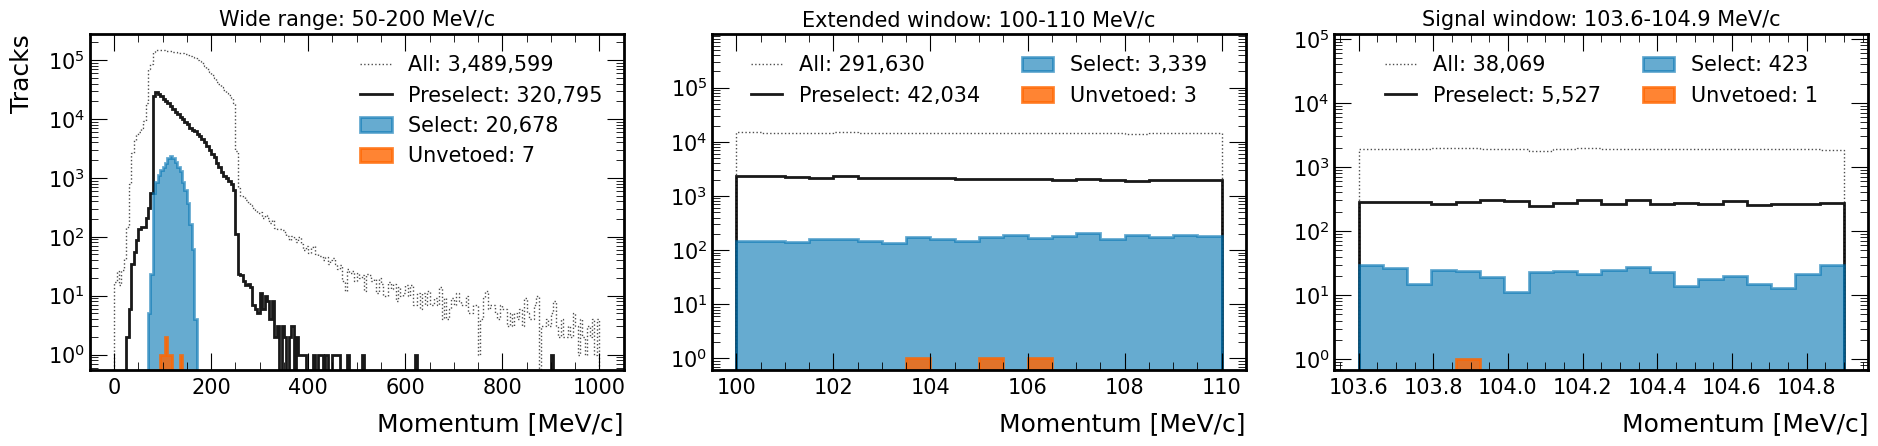

In [11]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

In [12]:
# import matplotlib.pyplot as plt 
# fig, ax = plt.subplots()
# draw._plot_histogram(results["hists"]["mom_full"], ax=ax, selection=["CE-like"])
# ax.set_xlim(50, 200)

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw/h1o_3x3_summary.png


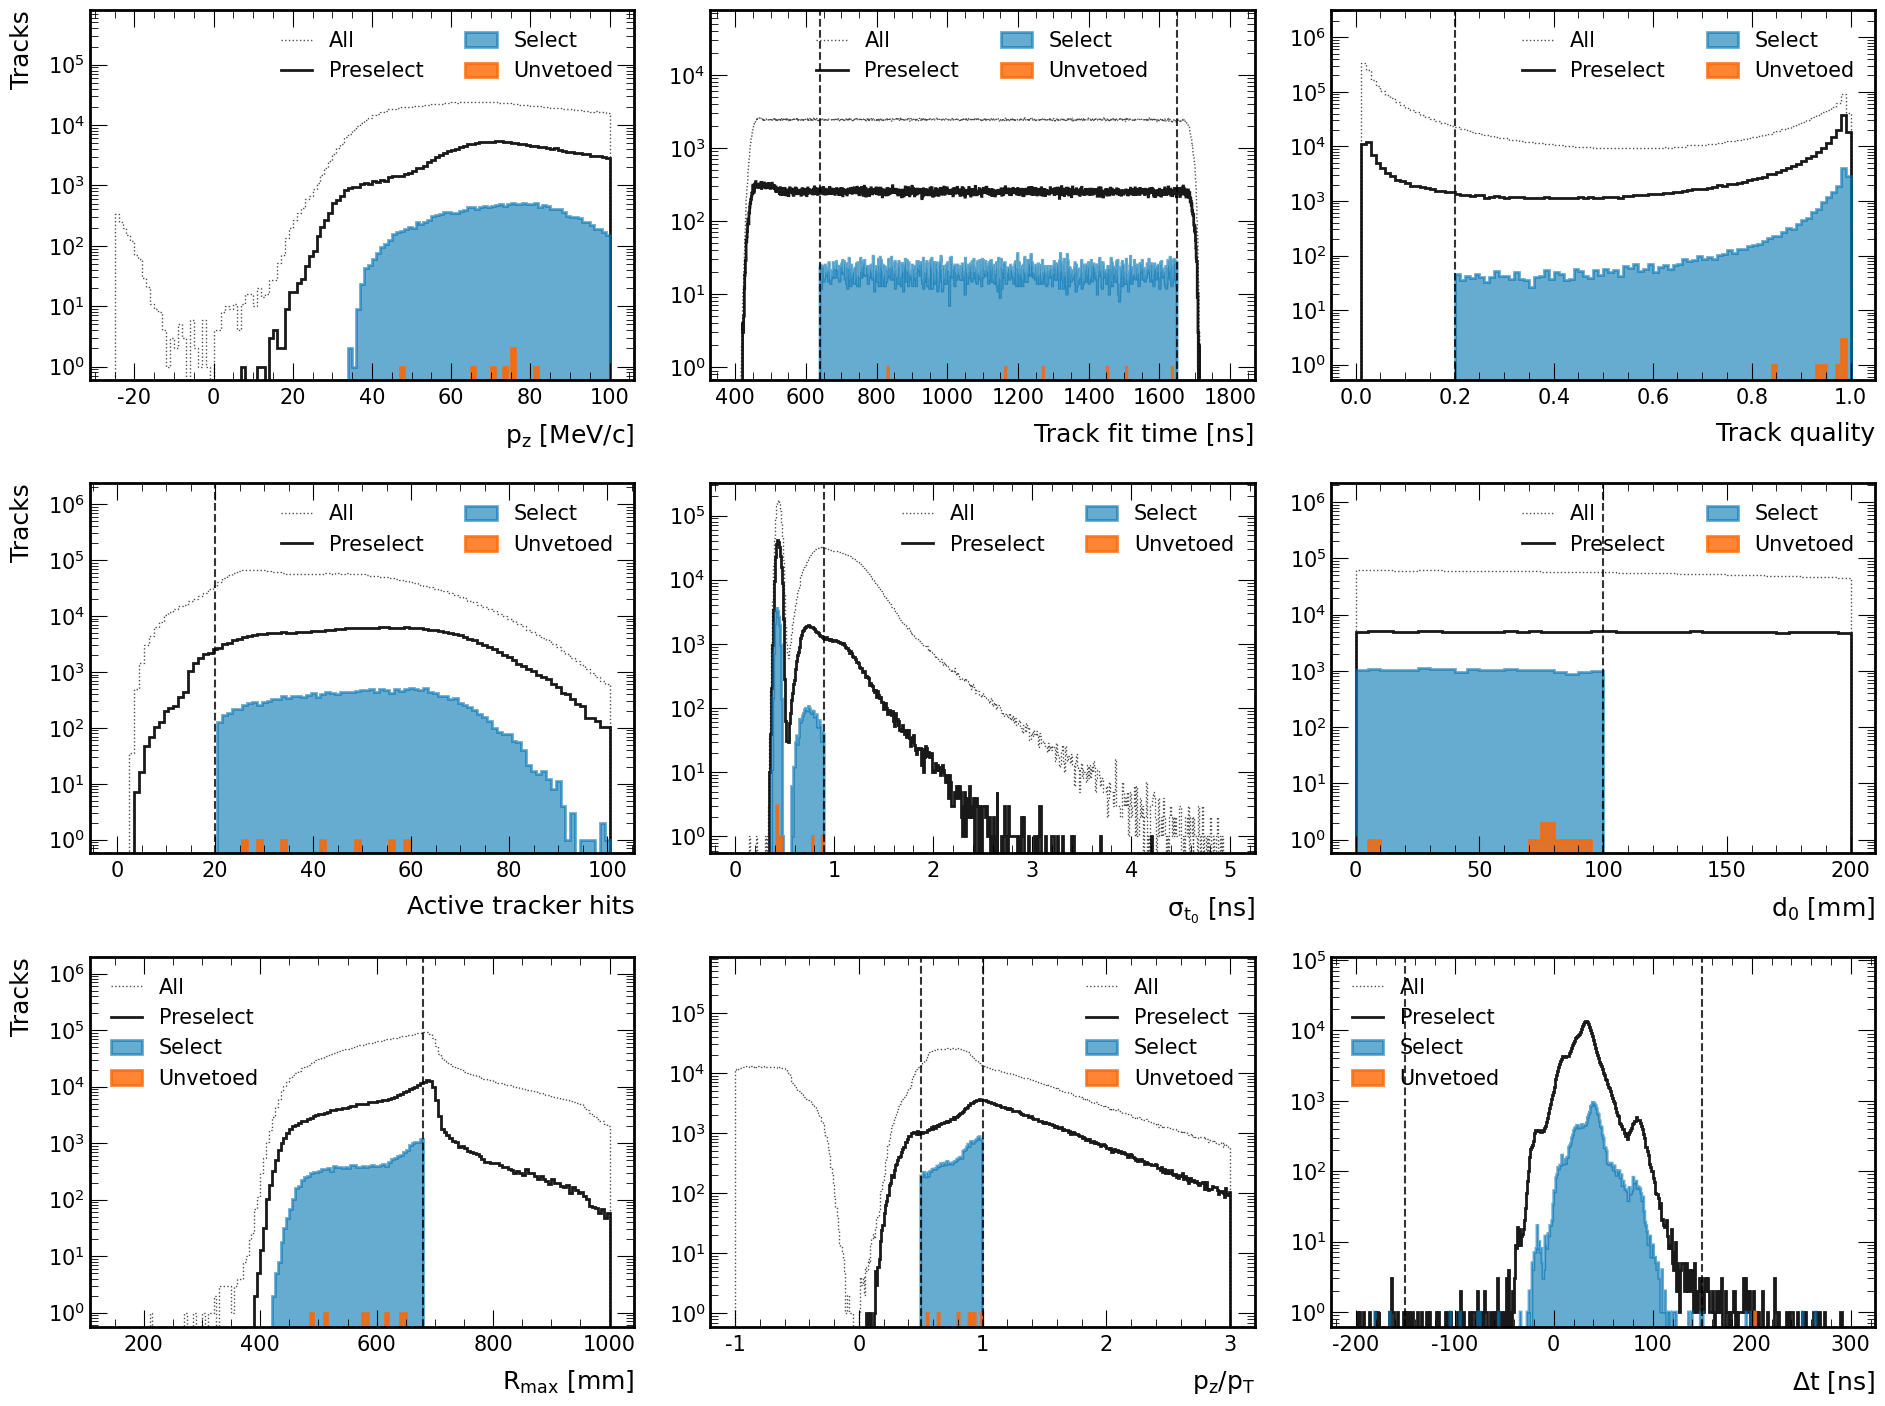

In [13]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

In [14]:
# 
# results["hists"]["dT"].loc["Select", :].sum()
results["hists"]["dT"][{"selection": "Select"}].sum()

24398.0

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw/h1o_2x2_mom_summary.png


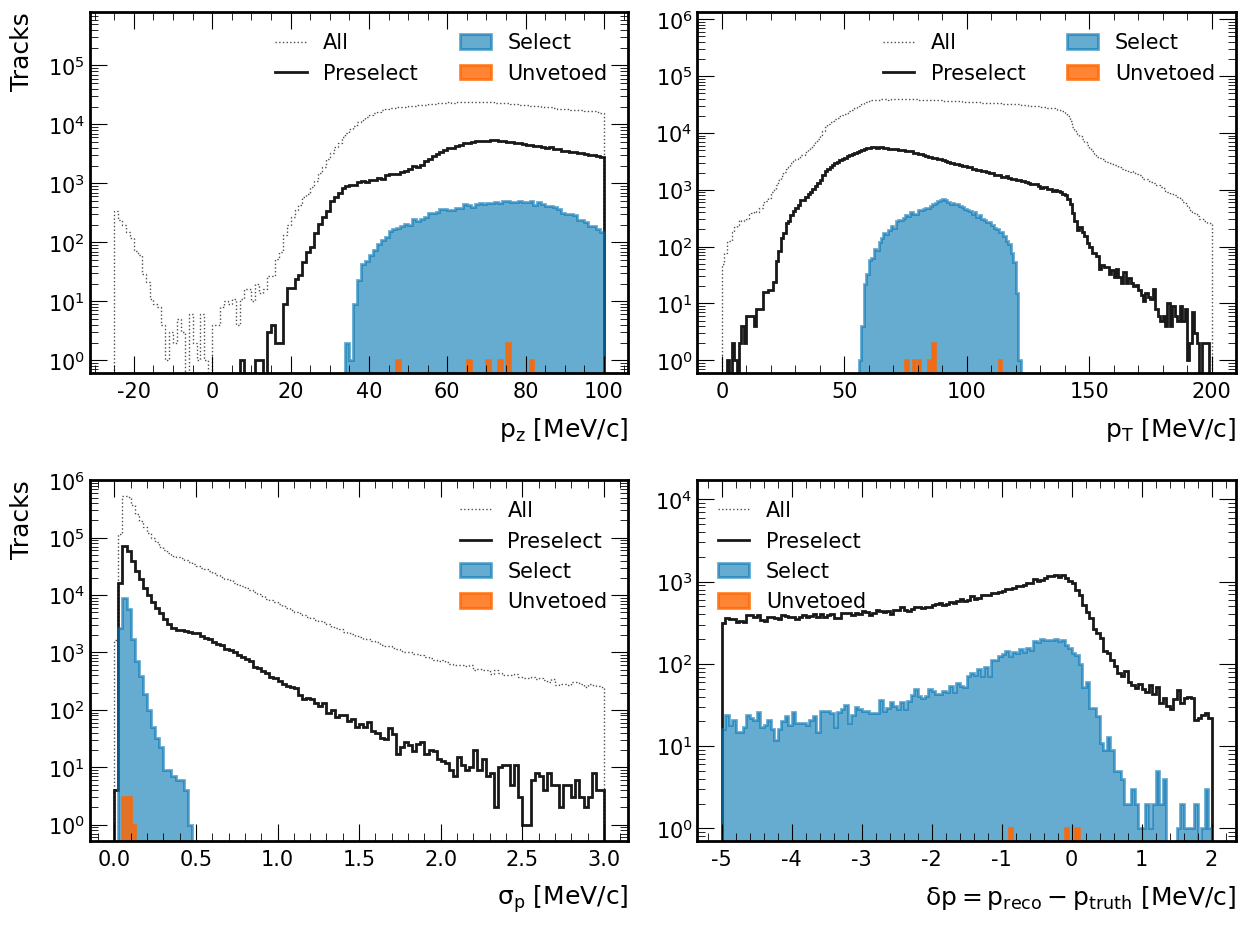

In [15]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_aw/h1o_crv_z.png


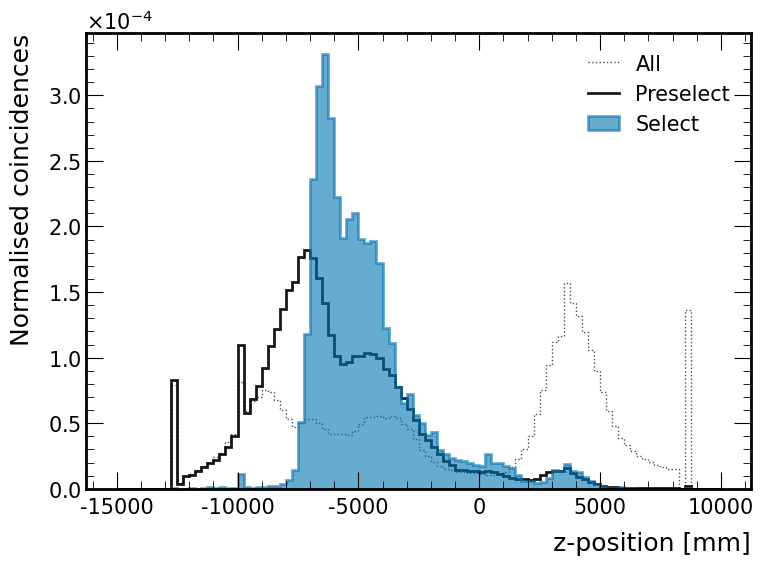

In [16]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [17]:
print(results["event_info"])

  Index:            49
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_perfect_v1_3_v06_06_00.001202_00000075.root
  Track time [ns]:  1445.708854
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            203
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_perfect_v1_3_v06_06_00.001202_00015581.root
  Track time [ns]:  822.944824
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            241
  Subrun:           [22708]
  Event:            [143277]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_perfect_v1_3_v06_06_00.001202_00020000.root
  Track time [ns]:  1157.122355
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            277
  Subrun:       

In [18]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 7 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, False, True]
within_t0: [True, True, True, True]
within_t0err: [True, False, True, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.898, 0.768, 0.555, 0.553, 0.552, ..., 0.977, 0.246, 0.552, 0.555], ...]
within_pitch_angle_lo: [True, False, True, False]
withi